In [1]:
cd ..

/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament


In [13]:
from catalog_query import get_VVV_catalog
import cutout_manager

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import regions
from regions import Regions

In [3]:
# importlib? 

In [4]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [5]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))


In [6]:
cutout_405 = cutout_manager.get_cutout_405(position_HMSFR, 8*u.arcmin, 3*u.arcmin, basepath='~/research/Research/JWST/')

FileNotFoundError: [Errno 2] No such file or directory: '/home/savannahgramze/research/Research/JWST//cloudc/images/F405_reproj_merged-fortricolor.fits'

In [ ]:
cat_VVV = get_VVV_catalog(position_HMSFR, w=3*u.arcmin, l=8*u.arcmin)
#get_VVV_catalog(pos_ctr, w=2*u.arcmin, l=2*u.arcmin)
print(len(cat_VVV))

9023


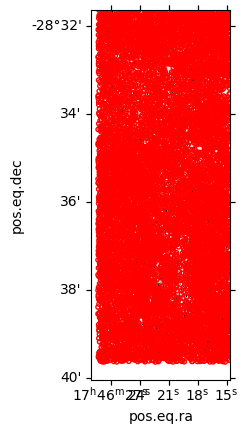

In [ ]:
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=10, facecolor='none', edgecolor='red')

In [ ]:
cat_VVV.columns

<TableColumns names=('SrcID','RAJ2000','DEJ2000','Name','PriOrSec','H1-Ks1pnt','e_H1-Ks1pnt','H2-Ks2pnt','e_H2-Ks2pnt','Clst','Cl','pStar','pGal','pNoise','_tab1_27','Z1ap1','e_Z1ap1','_tab1_30','e_Z1ap3','Z1perrb','_tab1_45','Z2ap1','e_Z2ap1','_tab1_48','e_Z2ap3','Z2perrb','_tab1_63','Y1ap1','e_Y1ap1','_tab1_66','e_Y1ap3','Y1perrb','_tab1_81','Y2ap1','e_Y2ap1','_tab1_84','e_Y2ap3','Y2perrb','_tab1_99','J1ap1','e_J1ap1','_tab1_102','e_J1ap3','J1perrb','_tab1_117','J2ap1','e_J2ap1','_tab1_120','e_J2ap3','J2perrb','_tab1_135','H1ap1','e_H1ap1','_tab1_138','e_H1ap3','H1perrb','_tab1_153','H2ap1','e_H2ap1','_tab1_156','e_H2ap3','H2perrb','_tab1_171','Ks1ap1','e_Ks1ap1','_tab1_174','e_Ks1ap3','Ks1perrb','_tab1_189','Ks2ap1','e_Ks2ap1','_tab1_192','e_Ks2ap3','Ks2perrb','Var','Prim')>

In [ ]:
cat_VVV[:1]

SrcID,RAJ2000,DEJ2000,Name,PriOrSec,H1-Ks1pnt,e_H1-Ks1pnt,H2-Ks2pnt,e_H2-Ks2pnt,Clst,Cl,pStar,pGal,pNoise,_tab1_27,Z1ap1,e_Z1ap1,_tab1_30,e_Z1ap3,Z1perrb,_tab1_45,Z2ap1,e_Z2ap1,_tab1_48,e_Z2ap3,Z2perrb,_tab1_63,Y1ap1,e_Y1ap1,_tab1_66,e_Y1ap3,Y1perrb,_tab1_81,Y2ap1,e_Y2ap1,_tab1_84,e_Y2ap3,Y2perrb,_tab1_99,J1ap1,e_J1ap1,_tab1_102,e_J1ap3,J1perrb,_tab1_117,J2ap1,e_J2ap1,_tab1_120,e_J2ap3,J2perrb,_tab1_135,H1ap1,e_H1ap1,_tab1_138,e_H1ap3,H1perrb,_tab1_153,H2ap1,e_H2ap1,_tab1_156,e_H2ap3,H2perrb,_tab1_171,Ks1ap1,e_Ks1ap1,_tab1_174,e_Ks1ap3,Ks1perrb,_tab1_189,Ks2ap1,e_Ks2ap1,_tab1_192,e_Ks2ap3,Ks2perrb,Var,Prim
,deg,deg,,,mag,mag,mag,mag,,,,,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,,
int64,float64,float64,str24,int64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,uint8,uint8
515855720984,266.585661,-28.660545,vvv J174620.56-283937.96,0,2.2924,0.0096,2.3749,0.0106,0.1601,-1,1.000000,0.000000,0.000000,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,55423.18251845,17.9995,0.1099,18.0206,0.1251,--,57277.09498171,18.1718,0.1219,18.2149,0.1413,--,55423.17567358,13.5669,0.0084,13.5405,0.0090,--,57277.08978701,13.6542,0.0084,13.6577,0.0100,--,55423.17868101,11.2501,0.0034,11.2481,0.0034,16,57277.09216409,11.3120,0.0032,11.2829,0.0035,16,0,1


Text(0.5, 0, 'H-Ks')

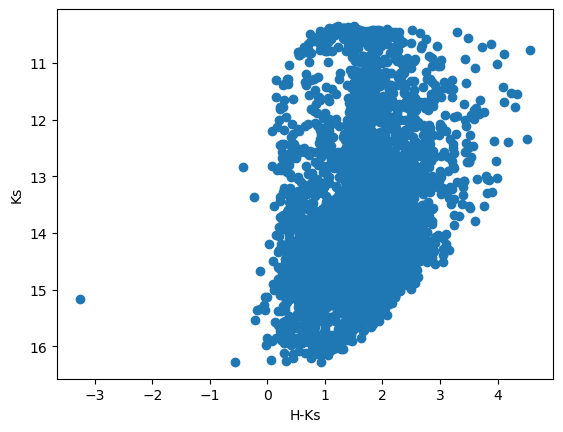

In [ ]:
color = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
mag = cat_VVV['Ks1ap1']

plt.figure()
plt.scatter(color, mag)

plt.gca().invert_yaxis()
plt.ylabel('Ks')
plt.xlabel('H-Ks')

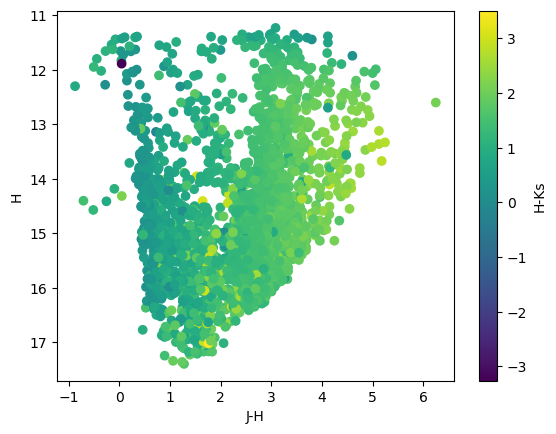

In [ ]:
color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
mag = cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']

plt.figure()
im = plt.scatter(color, mag, c=color2, cmap='viridis')

plt.gca().invert_yaxis()
plt.ylabel('H')
plt.xlabel('J-H')
plt.colorbar(im, label='H-Ks')

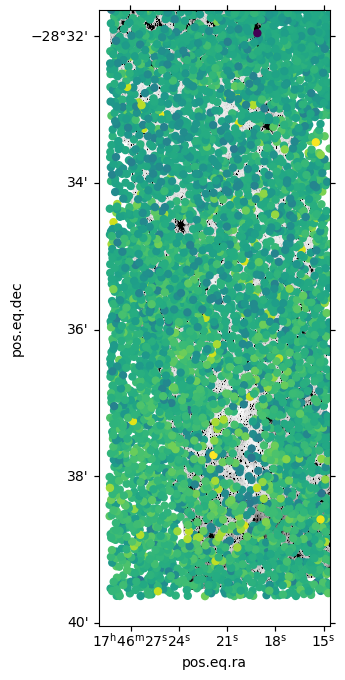

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=25, facecolor='none', c=color2, cmap='viridis')

In [1]:
color1 = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']

plt.figure()
plt.scatter(color, mag)

plt.gca().invert_yaxis()
plt.ylabel('H')
plt.xlabel('J-H')

NameError: name 'cat_VVV' is not defined

# JWST

In [5]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

In [6]:
#basetable = Table.read(f'{basepath}/catalogs/basic_merged_photometry_tables_merged_bgsub_blur.fits')
basetable = Table.read(f'{basepath}/catalogs/basic_merged_indivexp_photometry_tables_merged.fits')

In [7]:
basetable[:3]

skycoord_ref,skycoord_ref_filtername,sep_f410m,id_f410m,skycoord_f410m,flux_f410m,flux_err_f410m,mask_f410m,qfit_f410m,cfit_f410m,flux_init_f410m,flags_f410m,local_bkg_f410m,group_size_f410m,dra_f410m,ddec_f410m,std_ra_f410m,std_dec_f410m,nmatch_f410m,nmatch_good_f410m,flux_err_prop_f410m,flux_jy_f410m,mag_ab_f410m,eflux_jy_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f212n,id_f212n,skycoord_f212n,flux_f212n,flux_err_f212n,mask_f212n,qfit_f212n,cfit_f212n,flux_init_f212n,flags_f212n,local_bkg_f212n,group_size_f212n,dra_f212n,ddec_f212n,std_ra_f212n,std_dec_f212n,nmatch_f212n,nmatch_good_f212n,flux_err_prop_f212n,flux_jy_f212n,mag_ab_f212n,eflux_jy_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f466n,id_f466n,skycoord_f466n,flux_f466n,flux_err_f466n,mask_f466n,qfit_f466n,cfit_f466n,flux_init_f466n,flags_f466n,local_bkg_f466n,group_size_f466n,dra_f466n,ddec_f466n,std_ra_f466n,std_dec_f466n,nmatch_f466n,nmatch_good_f466n,flux_err_prop_f466n,flux_jy_f466n,mag_ab_f466n,eflux_jy_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f405n,id_f405n,skycoord_f405n,flux_f405n,flux_err_f405n,mask_f405n,qfit_f405n,cfit_f405n,flux_init_f405n,flags_f405n,local_bkg_f405n,group_size_f405n,dra_f405n,ddec_f405n,std_ra_f405n,std_dec_f405n,nmatch_f405n,nmatch_good_f405n,flux_err_prop_f405n,flux_jy_f405n,mag_ab_f405n,eflux_jy_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f187n,id_f187n,skycoord_f187n,flux_f187n,flux_err_f187n,mask_f187n,qfit_f187n,cfit_f187n,flux_init_f187n,flags_f187n,local_bkg_f187n,group_size_f187n,dra_f187n,ddec_f187n,std_ra_f187n,std_dec_f187n,nmatch_f187n,nmatch_good_f187n,flux_err_prop_f187n,flux_jy_f187n,mag_ab_f187n,eflux_jy_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,flux_f182m,flux_err_f182m,mask_f182m,qfit_f182m,cfit_f182m,flux_init_f182m,flags_f182m,local_bkg_f182m,group_size_f182m,dra_f182m,ddec_f182m,std_ra_f182m,std_dec_f182m,nmatch_f182m,nmatch_good_f182m,flux_err_prop_f182m,flux_jy_f182m,mag_ab_f182m,eflux_jy_f182m,emag_ab_f182m,near_saturated_f182m_f182m,replaced_saturated_f182m,flux_jy_410m405,mag_ab_410m405,flux_jy_405m410,mag_ab_405m410,flux_jy_182m187,mag_ab_182m187,flux_jy_187m182,mag_ab_187m182
"deg,deg",,deg,,"deg,deg",,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,"deg,deg",,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,"deg,deg",,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,"deg,deg",,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,"deg,deg",,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,"deg,deg",,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy
SkyCoord,bytes5,float64,int64,SkyCoord,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,bool,bool,float64,int64,SkyCoord,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,bool,bool,float64,int64,SkyCoord,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,bool,bool,float64,int64,SkyCoord,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,bool,bool,float64,int64,SkyCoord,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,bool,bool,float64,int64,SkyCoord,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64
"266.6060589860548,-28.575488631703763",f405n,5.123684304482283e-05,95147,"266.60611549728503,-28.575475890888264",--,--,True,--,--,--,--,--,--,--,--,--,--,--,-

In [8]:
mas_405 = np.logical_or(np.array(basetable['qfit_f405n'])<0.4, np.isnan(np.array(basetable['mag_ab_f405n'])))
mas_410 = np.logical_or(np.array(basetable['qfit_f410m'])<0.4, np.isnan(np.array(basetable['mag_ab_f410m'])))
mask = np.logical_and(mas_405, mas_410)
mas_466 = np.logical_or(np.array(basetable['qfit_f466n'])<0.4, np.isnan(np.array(basetable['mag_ab_f466n'])))
mask = np.logical_and(mask, mas_466)
mas_187 = np.logical_or(np.array(basetable['qfit_f187n'])<0.4, np.isnan(np.array(basetable['mag_ab_f187n'])))
mask = np.logical_and(mask, mas_187)
mas_182 = np.logical_or(np.array(basetable['qfit_f182m'])<0.4, np.isnan(np.array(basetable['mag_ab_f182m'])))
mask = np.logical_and(mask, mas_182)
mas_212 = np.logical_or(np.array(basetable['qfit_f212n'])<0.4, np.isnan(np.array(basetable['mag_ab_f212n'])))
mask = np.logical_and(mask, mas_212)

In [9]:
tbl_use = basetable[mask]
crds_use = tbl_use['skycoord_ref']

In [10]:
fn_405 = '/orange/adamginsburg/jwst/cloudc/images/F410_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [14]:
filament_reg = regions.Regions.read(f'{basepath}/regions_/filament_short.reg')
tbl_in = tbl_use[filament_reg[0].contains(crds_use, wcs=ww)]
crds_in = crds_use[filament_reg[0].contains(crds_use, wcs=ww)]

In [34]:
color_182_212 = tbl_use['mag_ab_f182m'] - tbl_use['mag_ab_f212n']
color_405_410 = tbl_use['mag_ab_f405n'] - tbl_use['mag_ab_f410m']
color_187_182 = tbl_use['mag_ab_f187n'] - tbl_use['mag_ab_f182m']
mag_187 = tbl_use['mag_ab_f187n']
mag_182 = tbl_use['mag_ab_f182m']
mag_410 = tbl_use['mag_ab_f410m']
mag_405 = tbl_use['mag_ab_f405n']

color_in_182_212 = tbl_in['mag_ab_f182m'] - tbl_in['mag_ab_f212n']
color_in_405_410 = tbl_in['mag_ab_f405n'] - tbl_in['mag_ab_f410m']
color_in_187_182 = tbl_in['mag_ab_f187n'] - tbl_in['mag_ab_f182m']
mag_in_187 = tbl_in['mag_ab_f187n']
mag_in_182 = tbl_in['mag_ab_f182m']
mag_in_410 = tbl_in['mag_ab_f410m']
mag_in_405 = tbl_in['mag_ab_f405n']

(0.0, 3.0)

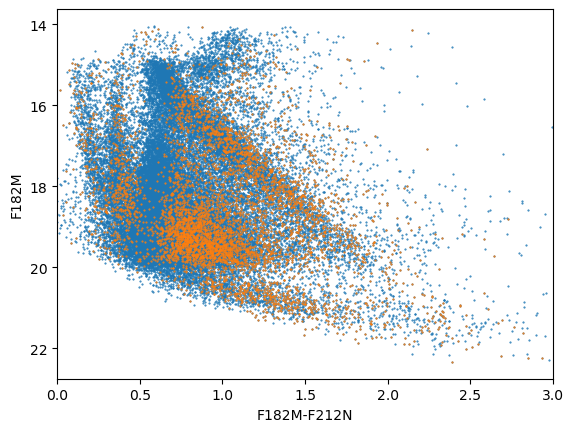

In [16]:
ax = plt.subplot(111)
ax.scatter(color_182_212, mag_182, s=1, marker='.')
ax.scatter(color_in_182_212, mag_in_182, s=1, marker='.')
plt.gca().invert_yaxis()
ax.set_xlabel('F182M-F212N')
ax.set_ylabel('F182M')
plt.xlim(left=0, right=3)

(-5.0, 1.0)

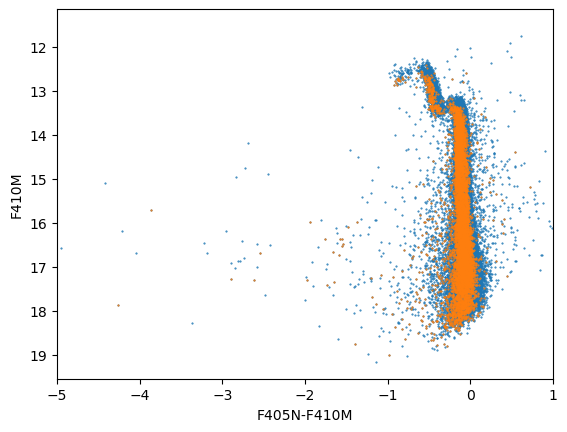

In [22]:
ax = plt.subplot(111)
ax.scatter(color_405_410, mag_410, s=1, marker='.')
ax.scatter(color_in_405_410, mag_in_410, s=1, marker='.')
plt.gca().invert_yaxis()
ax.set_xlabel('F405N-F410M')
ax.set_ylabel('F410M')
plt.xlim(left=-5, right=1)

Text(0, 0.5, 'F410M')

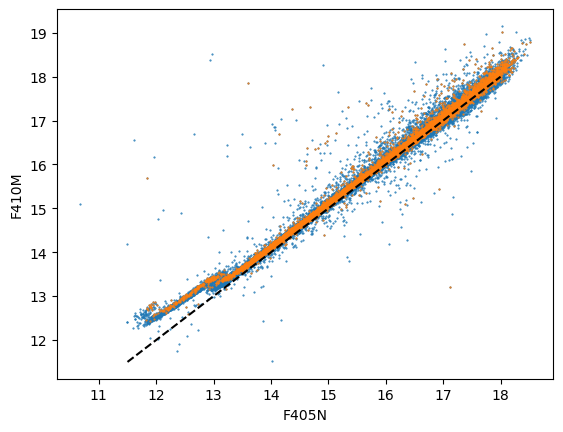

In [30]:
ax = plt.subplot(111)
ax.scatter(mag_405, mag_410, s=1, marker='.')
ax.scatter(mag_in_405, mag_in_410, s=1, marker='.')
ax.plot([11.5, 18], [11.5, 18], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F405N')
ax.set_ylabel('F410M')
#plt.xlim(left=-5, right=1)


Text(0, 0.5, 'F182M')

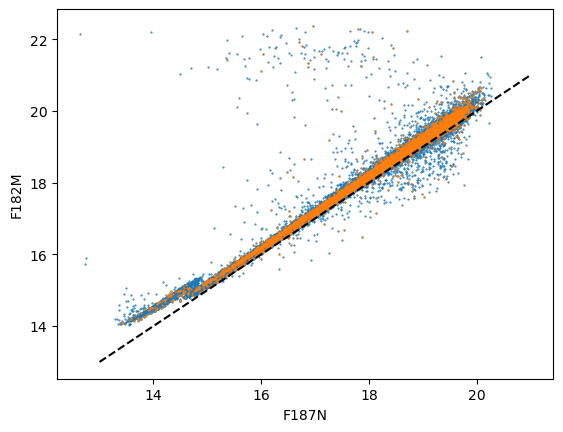

In [33]:
ax = plt.subplot(111)
ax.scatter(mag_187, mag_182, s=1, marker='.')
ax.scatter(mag_in_187, mag_in_182, s=1, marker='.')
ax.plot([13, 21], [13, 21], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F187N')
ax.set_ylabel('F182M')
#plt.xlim(left=-5, right=1)


(-2.0, 0.0)

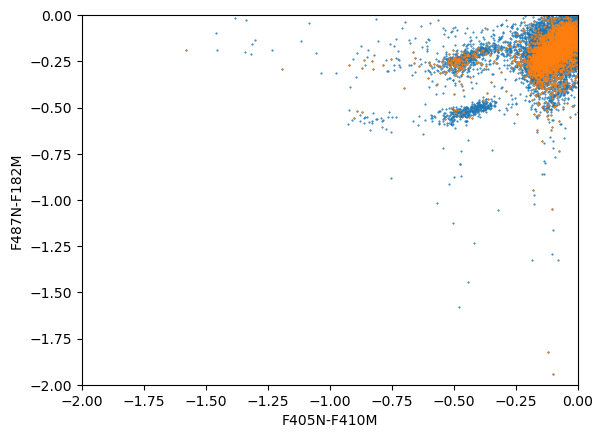

In [39]:
ax = plt.subplot(111)
ax.scatter(color_405_410, color_187_182, s=1, marker='.')
ax.scatter(color_in_405_410, color_in_187_182, s=1, marker='.')
#ax.plot([13, 21], [13, 21], 'k--')
#plt.gca().invert_yaxis()
ax.set_xlabel('F405N-F410M')
ax.set_ylabel('F487N-F182M')
plt.xlim(left=-2, right=0)
plt.ylim(bottom=-2, top=0)